# Aula 6: <br>Classificação - Knn, Regressão Logistica, Naive Bayes.
### Exercícios de Fixação

Francisco Aparecido Rodrigues, francisco@icmc.usp.br.<br>
Universidade de São Paulo, São Carlos, Brasil.<br>
Copyright (c) 2020.

Não é necessário entregar os exercícios abaixo, mas é importante resolvê-los para fixar os conteúdos estudados.

##### 1 - Repita todos os passos acima para a base de dados BreastCancer.

Vamos inicialmente ler os dados:

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
random.seed(42) # define the seed (important to reproduce the results)

data = pd.read_csv('data/BreastCancer.csv', header=(0))
# data = pd.read_csv('data/vertebralcolumn-3C.csv', header=(0))
# data = pd.read_csv('data/winequality-red.csv', header=(0))

data = data.dropna(axis='rows') #remove NaN
# armazena os nomes das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  

nrow, ncol = data.shape
print("Matriz de atributos: Número de linhas:", nrow, " colunas: ", ncol)
attributes = list(data.columns)
data.head(10)

Matriz de atributos: Número de linhas: 683  colunas:  11


,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0
5,1017122,8,10,10,8,7,10.0,9,7,1,1
6,1018099,1,1,1,1,2,10.0,3,1,1,0
7,1018561,2,1,2,1,2,1.0,3,1,1,0
8,1033078,2,1,1,1,2,1.0,1,1,5,0
9,1033078,4,2,1,1,2,1.0,2,1,1,0


Vamos construir as variáveis $X$ e $y$, sendo que o processo classificação se resume em estimar a função $f$ na relação $y = f(X) + \epsilon$, onde $\epsilon$ é o erro, que tem distribuição normal com média igual a zero e variância $\sigma^2$.

Convertemos os dados para o formato Numpy para facilitar a sua manipulação. 

In [2]:
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

Vamos normalizar os dados, de modo a evitar o efeito da escala dos atributos.

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [4]:
print('Dados transformados:')
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

Dados transformados:
Media:  [ 1.35242395e-16  1.14435873e-16  0.00000000e+00 -6.24195668e-17
  4.68146751e-17 -2.08065223e-17  0.00000000e+00  3.12097834e-17
  2.08065223e-17  3.12097834e-17]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Para treinar o classificador, precisamos definir o conjunto de teste e treinamento.

In [11]:
from sklearn.model_selection import train_test_split
p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

A partir desse conjunto de dados, podemos realizar a classificação.

## k-vizinhos

Para realizar a classificação, vamos usar a biblioteca scikit-learn (https://scikit-learn.org). É possível implementar o método usando métricas diferentes da Euclidiana, como as que podem ser vistas em: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

Vamos ajustar o modelo. Inicialmente, vamos considerar o método hold-out para selecionar o conjunto de teste e treinamento, que seleciona uma fração p de elementos para o conjunto de teste e (1-p), para treinamento. A seleção do modelo será feita usando validação cruzada.

Notem quem o valor da acurácia depende do número de vizinhos $k$. Podemos selecionar o melhor valor de $k$ usando validação cruzada. 

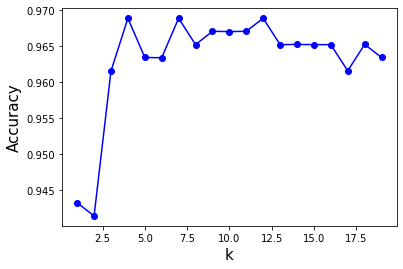

Melhor k: 4


In [12]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

nkf = 10 #number of folds
vk = [] # armazena os valores de k
vscore = []
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    # realiza a validação cruzada
    cv = cross_validate(model, x_train, y_train, cv=nkf)
    #print('k:', k, 'accurace:', cv['test_score'].mean())
    vscore.append(cv['test_score'].mean()) 
    vk.append(k)    

plt.plot(vk, vscore, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show(True)
best_k = np.argmax(vscore)+1
print('Melhor k:', best_k)

Usando todo o conjunto de treinamento, podemos ajustar o modelo e realizar a classificação no conjunto de teste.

In [13]:
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors=best_k, metric = 'euclidean')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy:', accuracy_score(y_pred, y_test))

Accuracy: 0.9343065693430657


## Regressão logística

Realizando a classificação por regressão logística:

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Acurácia: ', model.score(x_test, y_test))

Acurácia:  0.9562043795620438


## Naive Bayes

No classificador Naive Bayes, podemos assumir que os atributos são independentes.

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Accuracy: ', model.score(x_test, y_test))

Accuracy:  0.9635036496350365


##### 2 - Compare os três metodos de classificação para a base vertebralcolumn-3C.

In [22]:
# Lendo os dados
# data = pd.read_csv('data/BreastCancer.csv', header=(0))
data = pd.read_csv('data/vertebralcolumn-3C.csv', header=(0))
# data = pd.read_csv('data/winequality-red.csv', header=(0))

data = data.dropna(axis='rows') #remove NaN
# armazena os nomes das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  

nrow, ncol = data.shape
print("Matriz de atributos: Número de linhas:", nrow, " colunas: ", ncol)
print('Quantidade de Classes:', data['class'].unique())
attributes = list(data.columns)
data.sample(5)

Matriz de atributos: Número de linhas: 310  colunas:  7
Quantidade de Classes: ['Hernia' 'Spondylolisthesis' 'Normal']


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
39,52.419385,19.011561,35.872660,33.407825,116.559771,1.694705,Hernia
231,53.911054,12.939318,39.000000,40.971736,118.193035,5.074353,Normal
64,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Spondylolisthesis
237,62.140805,13.960975,58.000000,48.179830,133.281834,4.955106,Normal
22,63.073611,24.413803,54.000000,38.659808,106.424329,15.779697,Hernia


In [23]:
# Convertendo para numpy para facilitar a visualização
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

# Normalizando os dados para evitar o efeito de escala dos atributos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Definindo o conjunto de treino e teste
from sklearn.model_selection import train_test_split
p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

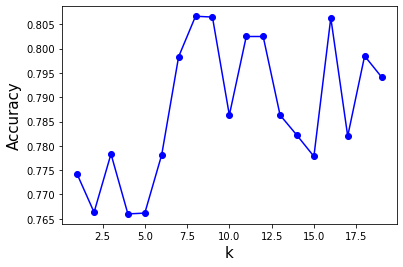

Melhor k: 8


In [24]:
# Obtendo o melhor k para o modelo KNN
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

nkf = 10 #number of folds
vk = [] # armazena os valores de k
vscore = []
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    # realiza a validação cruzada
    cv = cross_validate(model, x_train, y_train, cv=nkf)
    #print('k:', k, 'accurace:', cv['test_score'].mean())
    vscore.append(cv['test_score'].mean()) 
    vk.append(k)    

plt.plot(vk, vscore, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show(True)
best_k = np.argmax(vscore)+1
print('Melhor k:', best_k)

In [30]:
# Comparando os modelos
# from sklearn.metrics import accuracy_score
# model = KNeighborsClassifier(n_neighbors=best_k, metric = 'euclidean')
# model.fit(x_train, y_train)
# y_pred = model.predict(x_test)
# print('Accuracy:', accuracy_score(y_pred, y_test))

# from sklearn.linear_model import LogisticRegression
# from sklearn import metrics
# model = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
# model.fit(x_train, y_train)
# y_pred = model.predict(x_test)
# print('Acurácia: ', model.score(x_test, y_test))

# from sklearn.naive_bayes import GaussianNB
# from sklearn import metrics
# model = GaussianNB()
# model.fit(x_train, y_train)
# y_pred = model.predict(x_test)
# print('Accuracy: ', model.score(x_test, y_test))

models = [
    ('knn8', KNeighborsClassifier(8, metric = 'euclidean')),
    ('gaussianNB', GaussianNB()),
    ('logreg', LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000))
        ]

for name, model in models:
    model.fit(x_train, y_train)
    print('Accuracy ({}): \t{}'.format(name, model.score(x_test, y_test)))

Accuracy (knn8): 	0.7580645161290323
Accuracy (gaussianNB): 	0.8709677419354839
Accuracy (logreg): 	0.8548387096774194


##### 3 - Faça a classificação dos dados gerados artificialmente com o código abaixo. Gere as regiões de separação para os métodos estudados nessa aula.

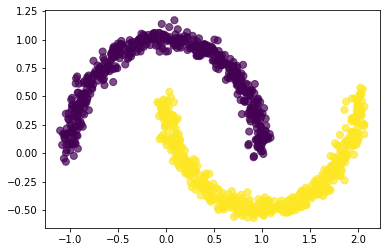

In [32]:
from sklearn import datasets
plt.figure(figsize=(6,4))

n_samples = 1000

data  = datasets.make_moons(n_samples=n_samples, noise=.05)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

## Região de decisão

Selecionando dois atributos, podemos visualizar a região de decisão. Para graficar a região de separação, precisamos instalar a bibliteca mlxtend: http://rasbt.github.io/mlxtend/installation/<br>
Pode ser usado: conda install -c conda-forge mlxtend

Para o método k-vizinhos mais próximos:

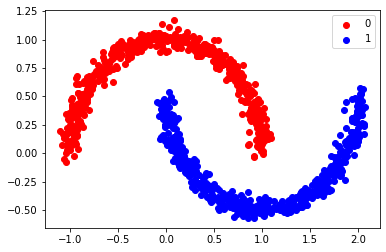

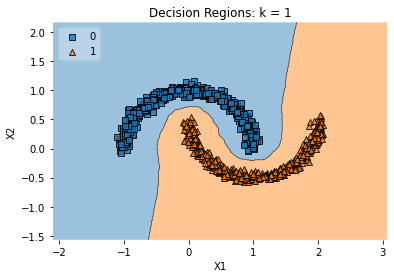

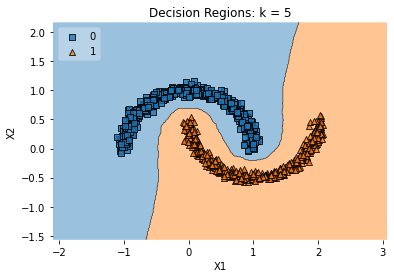

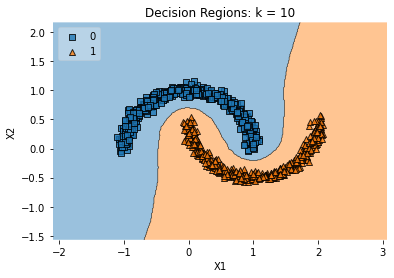

In [40]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as skdata
from matplotlib import pyplot
from pandas import DataFrame

# monta a matrix de atributos
d = np.column_stack((X,np.transpose(y)))
# converte para o formato dataframe do Pandas
data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y) 

# mostra os dados e colori de acordo com as classes               
colors = ['red', 'blue', 'green', 'black']                         
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
    aux = aux + 1
plt.legend()
plt.show()

# mostra as regiões de separação para diversos valores de k
vk = [1,5,10]
for k in vk:
    # Training a classifier
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    model.fit(X, y)
    # Plotting decision regions
    plot_decision_regions(X, y, clf=model, legend=2)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Regions: k = '+str(k))
    plt.show()

Para o classificador regressão logística:

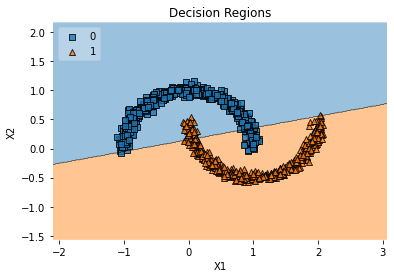

In [41]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# Training a classifier
model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(X, y)
# Plotting decision regions
plot_decision_regions(X, y, clf=model, legend=2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Regions')
plt.show()

Notem que as curvas de separação são retas.

Para o classificador Naive Bayes:

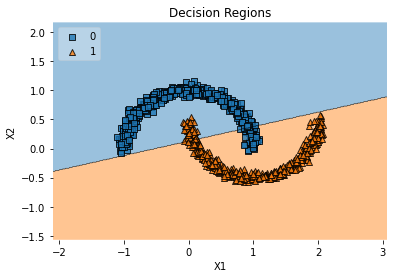

In [42]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

# Training a classifier
model = GaussianNB()
model.fit(X, y)

# Plotting decision regions
plot_decision_regions(X, y, clf=model, legend=2)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Regions')
plt.show()

Vejam que os métodos fornecem regiões de decisão diferentes.